# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)  
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)  
pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
df0 = pd.read_excel('Raisin_Dataset.xlsx')
df = df0.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [3]:
df.shape

(900, 8)

In [4]:
df.Class.value_counts(normalize=True)

Class
Kecimen   0.500
Besni     0.500
Name: proportion, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [12]:
df[df.duplicated()]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


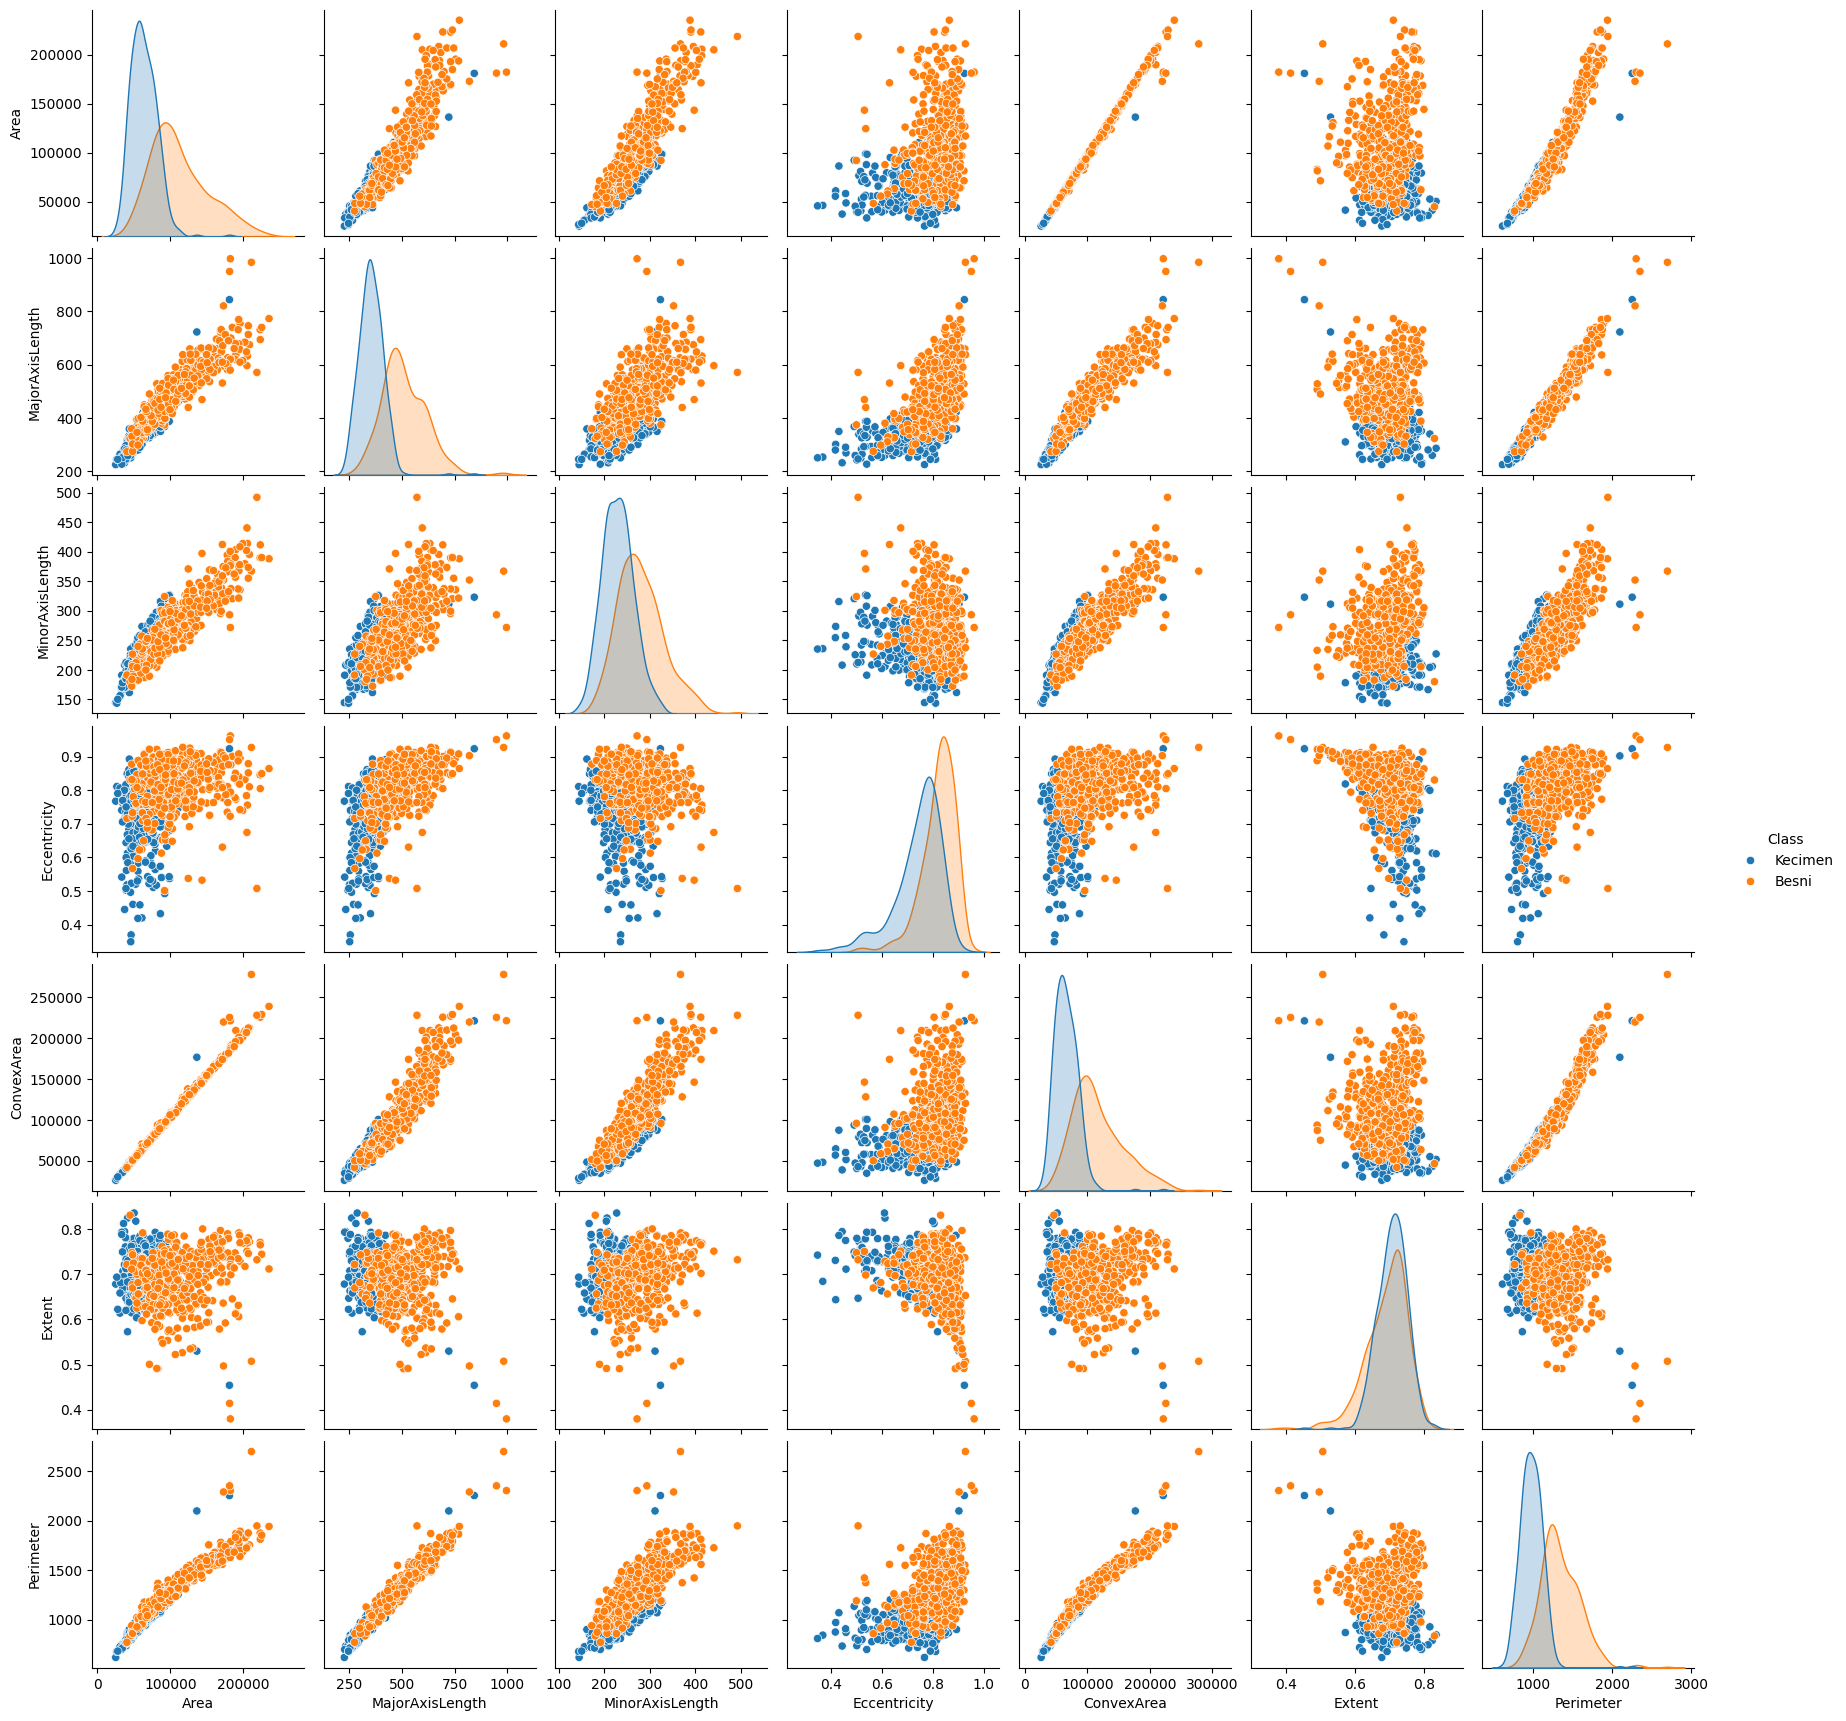

In [8]:
sns.pairplot(df, hue='Class');

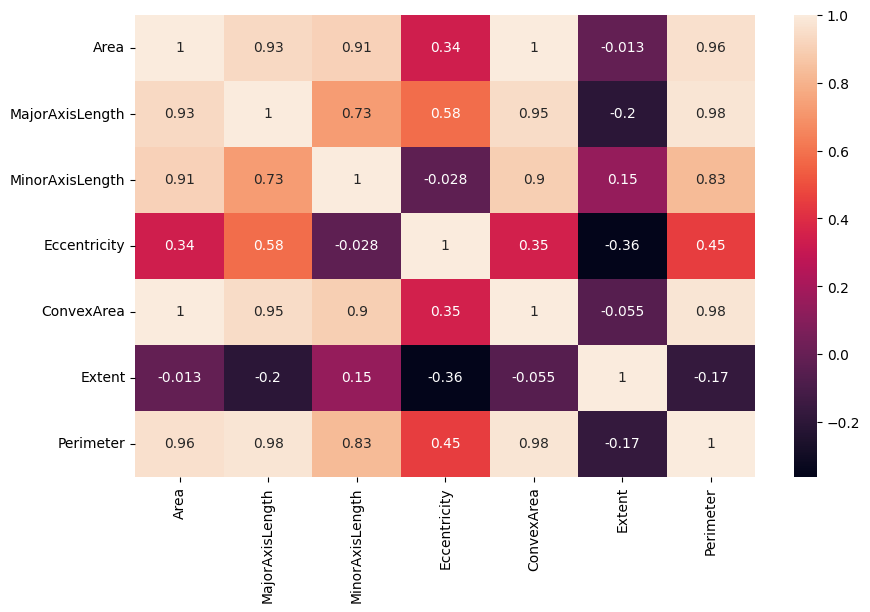

In [14]:
df_numeric = df.corr(numeric_only=True)
sns.heatmap(df_numeric, annot = True);

In [15]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

True

In [16]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

True

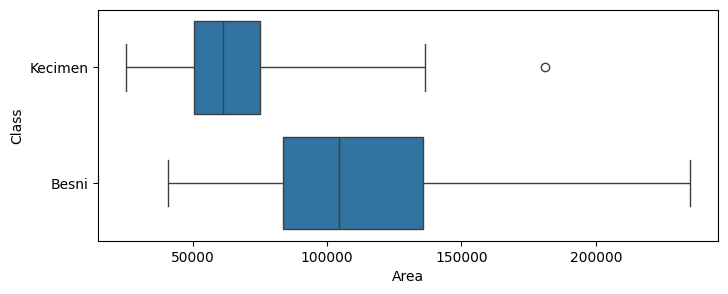

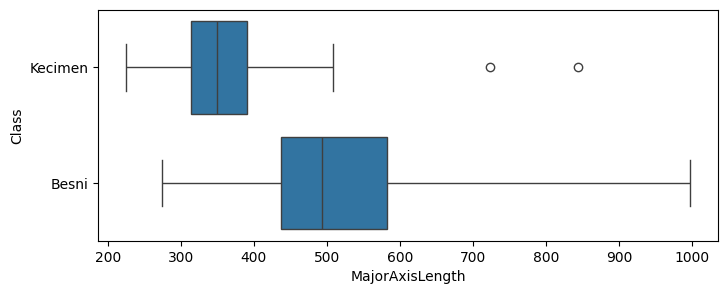

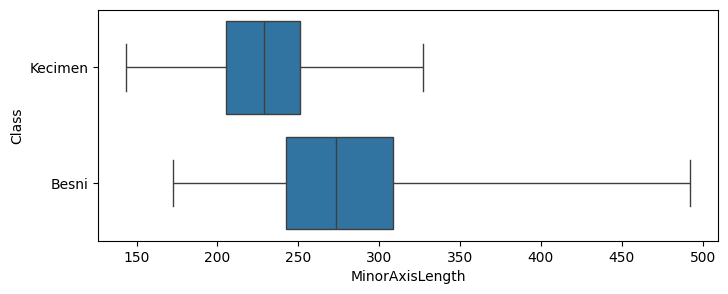

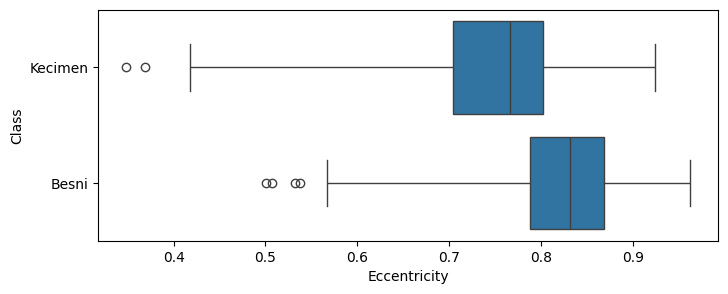

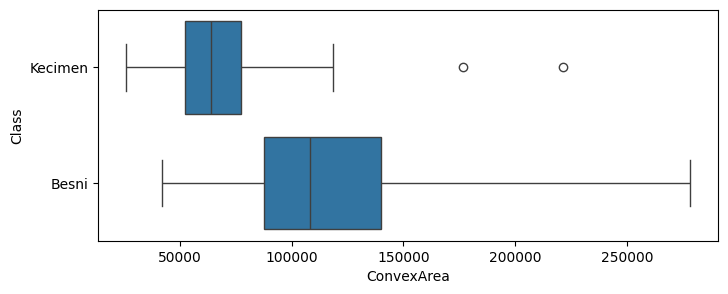

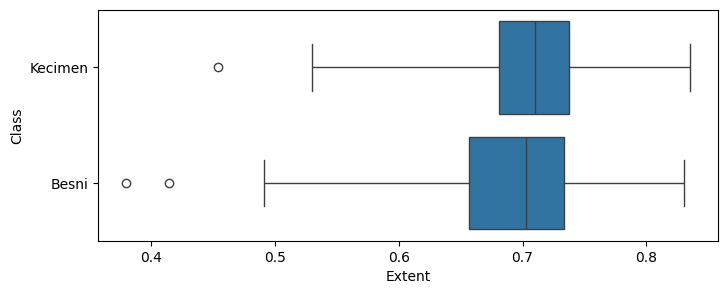

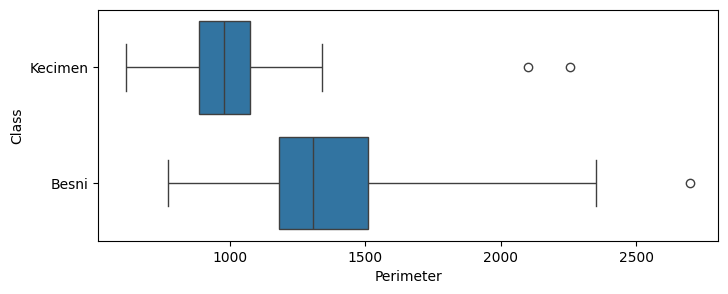

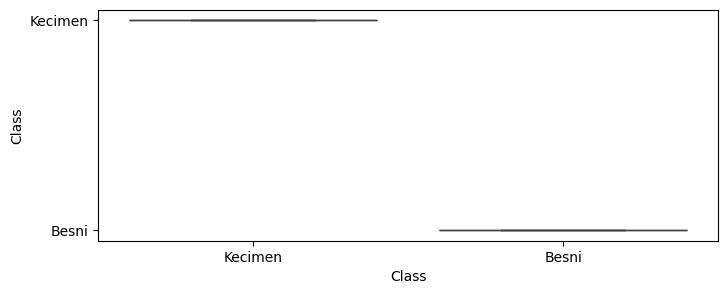

In [29]:
for col in df.columns:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=str(col), y="Class", data=df, whis=3)
    plt.show()   

## Train | Test Split and Scaling

In [30]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
log_model.coef_

array([[-0.20275466, -0.62289201,  0.64728258, -0.07828857, -0.50430195,
         0.25617524, -2.50406748]])

In [37]:
log_model.intercept_

array([-0.31312339])

In [40]:
y_pred = log_model.predict(X_test_scaled)
y_pred[:15]

array(['Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen'], dtype=object)

In [41]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.63792644e-01, 3.62073563e-02],
       [9.44677675e-01, 5.53223248e-02],
       [2.41413851e-01, 7.58586149e-01],
       [9.99999964e-01, 3.55758741e-08],
       [9.58455138e-01, 4.15448621e-02],
       [2.30479836e-01, 7.69520164e-01],
       [2.16017963e-01, 7.83982037e-01],
       [1.09484483e-01, 8.90515517e-01],
       [2.48989819e-01, 7.51010181e-01],
       [9.90447858e-01, 9.55214167e-03],
       [8.24337811e-01, 1.75662189e-01],
       [4.75049290e-02, 9.52495071e-01],
       [9.81282110e-01, 1.87178902e-02],
       [4.83153993e-02, 9.51684601e-01],
       [1.20827242e-01, 8.79172758e-01],
       [9.60860911e-01, 3.91390888e-02],
       [8.39413290e-01, 1.60586710e-01],
       [9.93843736e-01, 6.15626379e-03],
       [4.80793195e-02, 9.51920681e-01],
       [4.39662185e-01, 5.60337815e-01],
       [8.84339450e-01, 1.15660550e-01],
       [9.92945863e-01, 7.05413726e-03],
       [9.93491807e-01, 6.50819322e-03],
       [4.32464903e-01, 5.67535097e-01],
       [8.909732

## Model Performance

### Cross Validate

### GridSearchCV

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

# Conclusion 